# Project Part 3

## 1. Introduction

Paper Link: https://www.semanticscholar.org/paper/Using-data-mining-to-predict-secondary-school-Cortez-Silva/61d468d5254730bbecf822c6b60d7d6595d9889c

Cortez and Silva's paper -- 'Using data mining to predict secondary school student performance' -- investigates the impact of several sociodemographic factors on student achievment in seconary education through the use of BI/DM techniques [Business Intelligence (BI) and Data Mining (DM)]. The combined use of these technqiues allowed for the authors to analyze recent real-world data (e.g. student grades, demographic, social and school related features) in order to uncover hidden patterns and predict future outcomes.

The paper includes two datasets collected during the 2005–2006 school year from two Portuguese secondary schools, each corresponding to a core subject: Mathematics and Portuguese.

Both datasets combine school records (grades and absences) with student questionnaires on demographics, family background, social behavior, and study habits. Each contains 33 variables, with one observation per student.

A third dataset includes students enrolled in both courses

## 2. Relate Research Questions, Data, and Figures 

**Section 1: Data and research questions**

***A. Describe the Data***

Verbally summarize what the procedure was for creating the data

    Data was collected from two Portuguese secondary schools, Gabriel Pereira (GP) and Mousinho da Silveira (MS), to investigate factors influencing student performance in Mathematics and Portuguese. Each student completed a questionnaire on demographics, family background, study habits, and lifestyle, which was combined with academic records containing three subject grades (G1, G2, G3). The resulting datasets capture academic, personal, and social influences on student achievement.

What are the features? How many, and what do they tell us about the observations

    
    There are 33 features in total, representing demographic, behavioral, and academic factors. Together, they describe the personal and academic context of each student.


    Examples: 
    - Demographics: sex, age, address 
    - Family & Socioeconomic: Medu, Fedu, Mjob, Fjob, famsize 
    - Educational Support: schoolsup, famsup, paid 
    - Lifestyle & Social: freetime, goout, Dalc, Walc, health 
    - Academic: Studytime, failures, absences, G1, G2, G3


What are the observations? How many, and how were they collected?
    
    Each observation represents a single student: 395 in the Math dataset, 649 in the Portuguese dataset, and 382 in the merged dataset of students enrolled in both courses.

    Observations were collected through the use of questionarres and school reports for each respective student

***B. Describe how the data relates to the research question the authors were asking, and one other research question that you could ask***

Describe the research question the authors were asking: what specific hypothesis did they have and  and why was this data appropriate to investigate that hypothesis

    The authors aimed to model student academic performance based on socio-demographic attributes. Their hypothesis was that non-academic factors - family background, study time and school support - influenced final grades. The dataset was appropriate because it quantified these variables and connected them to performance outcomes , allowing correlation and regression analyses to identify which features best predict success.


Describe one other research question that could be asked using this data, why this data would be useful for that purpose 

    Using the same dataset, it could be possible to investigate how parental education level influences students' academic practice. The dataset’s variables on mother and father education level (Medu/Fedu), study time and final grade make it well suited for this particular focus.


**Section 2: Data Files**

Describe the format of the data (including the delimiters), the number of rows and columns, and how the file relates to the data in the paper.

    Student-mat.csv
    - Math-course data; each row refers one student with demographic, social, and grade information
    - 395 × 33
    - CSV text file
    
    Student-por.csv
    - Portuguese-course data; same structure and variables as above
    - 649 × 33
    - CSV text file 
   
    Student-merge.R
    - R script used to merge the two subject datasets on shared observations
    - 382× 53
    - R syntax 
   
    Student.txt
    - List all the variables and their meanings
    - Plain text description


**Section 3: Visualizations and Data Summaries**

***Figure 1: Histograms for the output variables (binary/5-level classification and regression) -- Located on Page 5***

Describe how it was generated: what are the axes? What are the individual data points? Or what are the cells in the table 
    
    X-axis = Final Grade 
    Y-axis = Count of Students.
    Each bar represents a group of students whose final grade falls within a specific interval.

Describe why the authors chose to include that particular figure. How does it contribute to the overall arguments of the paper, or support the hypothesis, or show some characteristic of the data 
    
    The histogram visualizes the overall grade distribution, showing how grades are spread across the population before any modeling. This helps justify later approaches, because the data is not uniform and has natural grade thresholds.

Describe what conclusions we can draw from this figure/table
    
    The figure shows most students scoring between 10–15, with fewer at the extremes. The slight left skew indicates fewer failures but enough to justify predictive modeling for at-risk students.


***Table 6: Relative importance of the input variables for the best RF model -- Located on page 7***

Describe how it was generated: what are the axes? What are the individual data points? Or what are the cells in the table 

    This table illustrates the relative importance (%) of the five most influential variables identified by the Random Forest (RF) model across binary, five-level, and regression setups for Mathematics and Portuguese. Each cell reflects how much a variable contributed to model accuracy, with higher percentages indicating greater influence.
Describe why the authors chose to include that particular figure. How does it contribute to the overall arguments of the paper, or support the hypothesis, or show some characteristic of the data 

    The authors included this table to demonstrate which factors most influenced prediction outcomes, connecting model results to educational variables, revealing which student, family, and school factors most affect achievement.
Describe what conclusions we can draw from this figure/table

    Across the models, past grades (G1 and G2), failures, and absences were the strongest predictors. This shows that previous performance and attendance are key to academic success. Socio-demographic factors, such as the parents' jobs, interest in higher education and school support, surprisingly have smaller effects.


***Describe one other figure or table that you might make that would be useful for understanding this data.***

Proposed Figure – Correlation of Studytime, Absences, and G3
    
    I would create a scatter plot showing the relationship between study time, school absences, and final grade (G3).
    
    X-axis: Number of absence
    Y-axis: Final grade (G3)
    Hue: Weekly study time

Why it would be helpful
    
    This figure would show how study habits and attendance affect performance, revealing that students who study more and attend regularly earn higher grades, while frequent absences correspond to lower scores.

What it might show
    
    A negative trend between absences and G3, with points representing higher study time centered around higher grades. This would support the idea that consistent attendance and study both contribute to student success.


## 3. Data cleaning and exploration


**3.1 Load and Clean Data**

Describe steps someone can take to obtain the data files you are working with. 

    1. Go to the public “Student Performance” dataset page associated with the Cortez & Silva (2008) paper.

    2. Download the files student-mat.csv and student-por.csv.

    3. Save both files in the same directory as this Jupyter notebook.

    4. When reading the files, use sep= ';' as the original file uses a semicolon delimter

Code to read data and show head

In [43]:
import pandas as pd
Math = pd.read_csv("student-mat.csv", sep=";")
Portugese = pd.read_csv("student-por.csv", sep=";")

In [44]:
print("Math dataset head:")
math.head()

Math dataset head:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [45]:
print("Portuguese dataset head:")
Portugese.head()

Portuguese dataset head:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Checking and Cleaning Data
    
    Because the dataset is already well structured, additional cleaning was not required. To ensure that the dataframe was complete, I ran math.sum to check that each column did not have missing values.

In [46]:
print(Math.sum)
print(Portugese.sum)

<bound method DataFrame.sum of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel free

**3.2 Describe Data Numerically**

Data Shape

In [47]:
print(Math.shape)

(395, 33)


    The math dataframe has 395 rows and 33 columns, meaning there are 395 observations and 33 features for each observation

    - 395 rows means 395 students as each row is one observation.
    - 33 columns means 33 features per student

In [48]:
print(Portugese.shape)

(649, 33)


    The portugese dataframe has 649 rows and 33 columns, meaning there are 649 observations and 33 features for each observation

    - 649 rows means 649 students as each row is one observation
    - 33 columns means 33 features per student

Describe features

    I will be investigating features in the math dataframe

    Feature 1. Traveltime 

    home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

    Prediction: 
    - I expect the count to be 395 (equal to the number of students
    - The mean should be a relatively normal to low value, as I expect normal student academic patterns
    - Because it is an ordinal catagorical feature, I expect the min to be 1 and the max to be 4

    Feature 2. Studytime 

    weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

    Prediction: 
    - I expect the count to be 395 (equal to the number of students
    - The mean should be a relatively normal, as I expect students to not live too far from school
    - Because it is an ordinal catagorical feature, I expect the min to be 1 and the max to be 4

In [49]:
math['traveltime'].describe()

count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [50]:
math['studytime'].describe()

count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

The results matched expectations. Count for each feature equaled 395, the mean values are close to the middle (+/- 0.5 from 2) and the max and min values are 4 and 1, respectively. 

3.3 Visualizations

    Plot #1 Traveltime distribution

    - I want to see how many students fall into each time catagory

    - A histogram is appropriate to illustrate this distribution, providing insight into how far students travel to school and the exact proportion for each length of time

    - to code the visualization, I used seaborn to create a histogram, loading the data from the math dataframe and setting the x axis equal to traveltime

In [51]:
import seaborn as sns

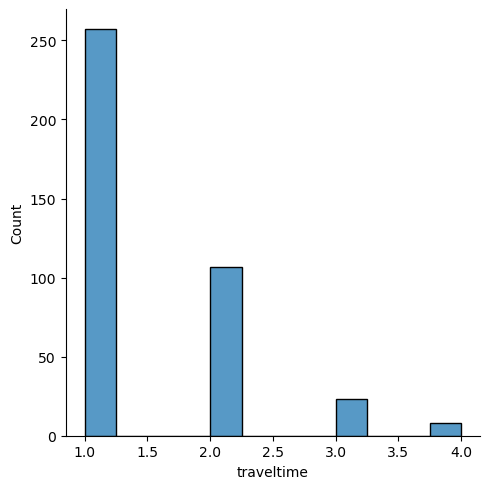

In [52]:
sns.displot(data = Math, x = 'traveltime')

    the histogram alligns well with the the output in 3.2 as the mean value of 1.4 is illustrated with the overwhelming majority of students having a travel time ordinal value of 1 (less than 15 minutes)

    plot #2 Studytime vs final grade (g3)

    - I want to see if there is a relationship between studytime and the final grade students received.

    - I used a displot with the col option to illustrate this relationship as it is  

    - to code the visualization, I used seaborn to create a displot, loading the data from the math dataframe and setting the x axis equal to studytime, and the col option to final grade



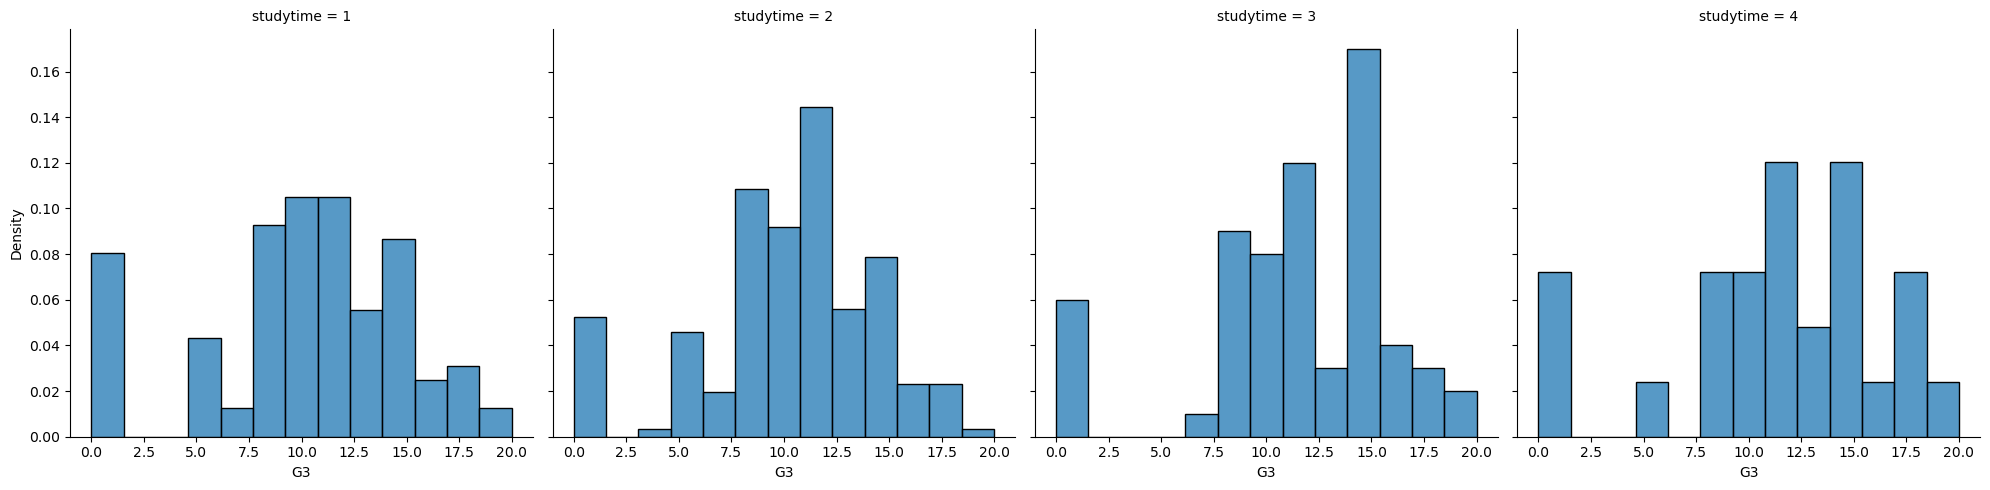

In [64]:
sns.displot(data = Math, x = 'G3', col = 'studytime', stat='density',
            common_norm=False)

The displot provides iteresting insight into the dynamics of student preformance, as students with the highest reported study time do not demonstrate the largest proportion of highest preforming students. Nonetheless they are the most right shifted. 

I believe this visualization touches on the primary focus on this paper, as sociodemographic factors play a large role in student acheivement, study time alone does not dictate student success.